# Introduction


This is a transnational dataset containing all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts, with a significant portion of customers being wholesalers.

# Problem

Suppose you are the head of this store and you wish to understand the preferences of your customers to scale up your business. Is it possible for you to look at the details of each customer and devise a unique business strategy for each one of them? Definitely not. But what you can do is to cluster all your customers into, say, 10 groups based on their purchasing habits and use a separate strategy for customers in each of these 10 groups. And this is what we call clustering.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms


In [128]:
file_path = 'data/Online Retail.csv'

df = pd.read_csv(file_path)
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Exploratory Data Analysis

In [129]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [131]:
df.duplicated().sum()

5268

In [132]:
df.drop_duplicates(inplace=True)

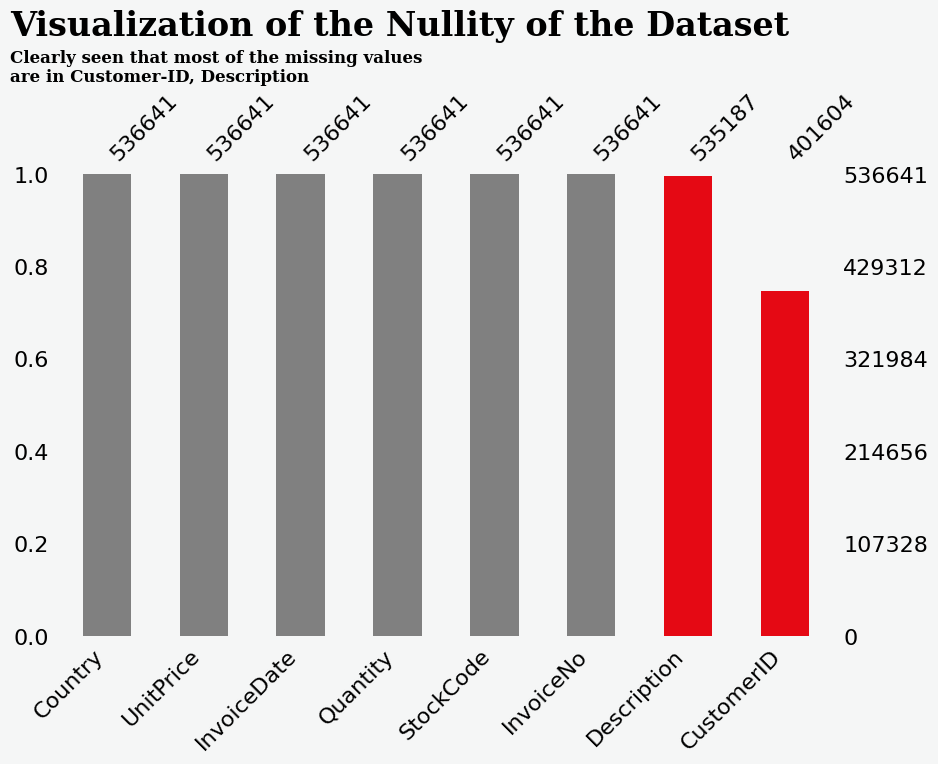

In [133]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

# Define colors for bars
color = ['grey'] * 6 + ['#E50914'] * 4

# Plot missing values using missingno library
ms.bar(df, fontsize=16, color=color, sort='descending', ax=ax)

# Add title and subtitle
title_props = {'font': 'serif', 'color': 'black', 'weight': 'bold', 'size': 24}
subtitle_props = {'font': 'serif', 'color': 'black', 'weight': 'bold', 'size': 12}

ax.text(-1, 1.3, 'Visualization of the Nullity of the Dataset', title_props)
ax.text(-1, 1.2, 'Clearly seen that most of the missing values\nare in Customer-ID, Description', subtitle_props)

# Show the plot
plt.show()


In [134]:

# drop all rows having missing values
df = df.dropna()
df.shape

(401604, 8)

let's create a new column amount

In [135]:
df["amount"]=df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


# Preprocessing

# RFM Analysis

RFM (Recency, Frequency, Monetary)  analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization service.

Valuing customers based on a single parameter is insufficient.

For example, you can say that people who spend the most are your best customers. Most of us agree and think the same.

But wait! What if they purchased only once? Or a very long time ago? What if they are no longer using your product?

So..can they still be considered your best customers? Probably not.

Judging customer value on just one aspect will give you an inaccurate report of your customer base and their lifetime value.

That’s why, RFM model combines three different customer attributes to rank customers.

If they bought in recent past, they get higher points. If they bought many times, they get higher score. And if they spent bigger, they get more points. Combine these three scores to create the RFM score.

Finally you can segment your customer database into different groups based on this Recency – Frequency – Monetary score.


## Monetary

In [136]:
rmf_df = (
    df.groupby('CustomerID')['amount']
    .sum()
    .reset_index()
    .rename(columns={'amount': 'Monetary'})
)

rmf_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## Frequency

In [137]:
frequency_df = (
    df.groupby('CustomerID')['InvoiceNo']
    .count()
    .reset_index()
    .rename(columns={'InvoiceNo': 'Frequency'})
)

rmf_df = rmf_df.merge(frequency_df, on='CustomerID')
rmf_df.head()

,CustomerID,Monetary,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


## Recency

In [138]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Compute the max date
max_date = max(df['InvoiceDate'])

# Compute the diff
df['diff'] = max_date - df['InvoiceDate']

# Recency DataFrame
recency_df = (
    df.groupby('CustomerID')
    .agg(recency=('diff', 'min'))
    .reset_index()
)

## Convert timedelta to days
recency_df['recency'] = recency_df['recency'].dt.days

# Merge recency_df with rmf_df
rmf_df = pd.merge(rmf_df, recency_df, on='CustomerID', how='inner')

# Rename columns in the merged DataFrame
rmf_df.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']

# Display the first few rows of the merged DataFrame
rmf_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


## Data Visualizations

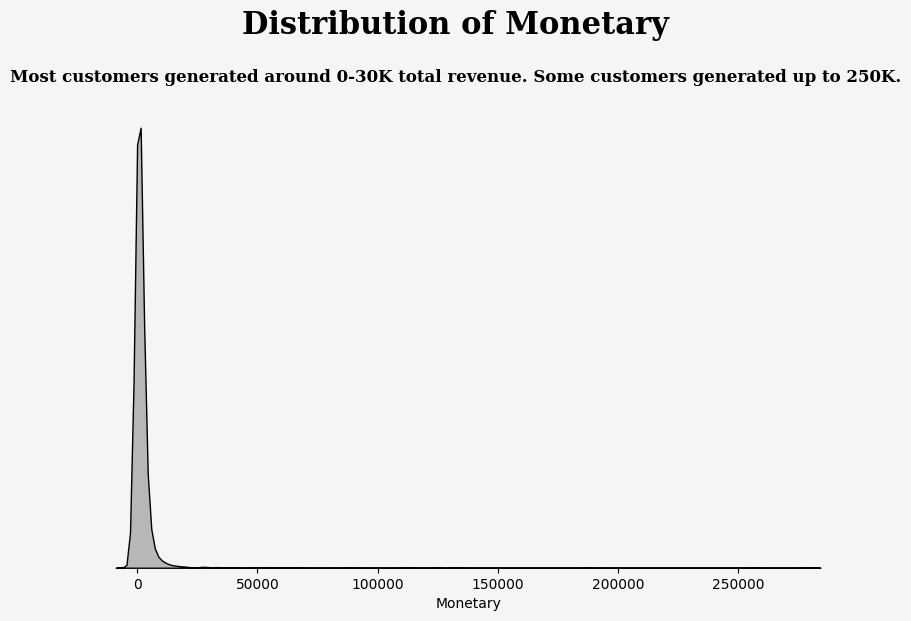

In [139]:
def plot_distribution(data, column, title, description):
    """
    Plot KDE distribution for a given column in the DataFrame.

    Parameters:
    - data: DataFrame
    - column: str, column name to plot
    - title: str, plot title
    - description: str, plot description
    """
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the KDE distribution
    sns.kdeplot(data[column], color="black", fill=True, ax=ax)

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')

    # Remove unnecessary axis elements
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add title and subtitle
    fig.text(0.5, 1, title, {'font': 'Serif', 'weight': 'bold', 'size': 22, 'color': 'black'},
             ha='center')
    fig.text(0.5, 0.92, description, {'font': 'Serif', 'weight': 'bold', 'size': 12, 'color': 'black'}, ha='center')

    # Show the plot
    plt.show()


# Plot distribution of 'Monetary'
plot_distribution(rmf_df, "Monetary", "Distribution of Monetary", "Most customers generated around 0-30K total revenue. Some customers generated up to 250K.")

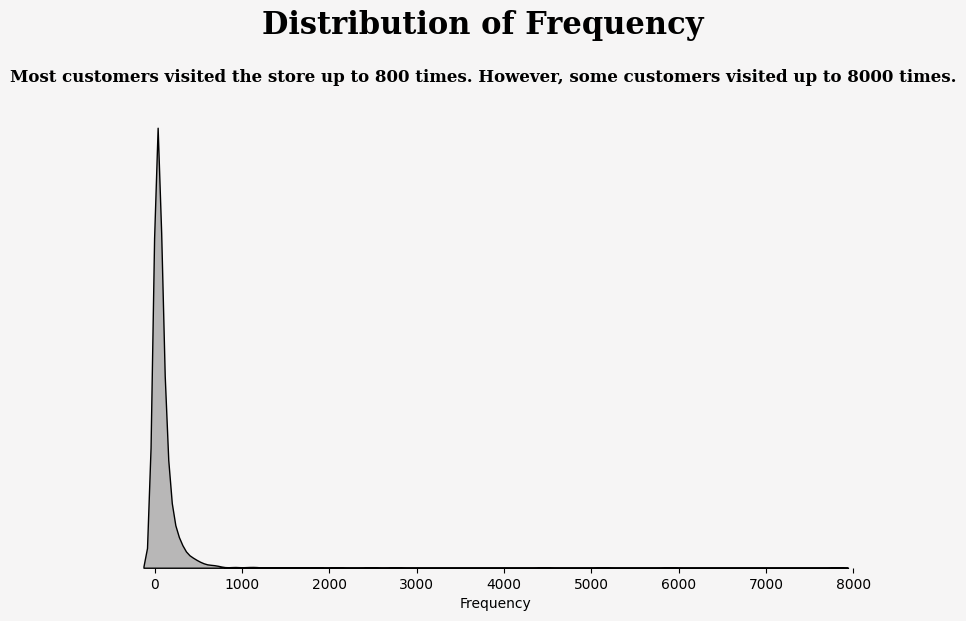

In [140]:
## Plot distribution of 'Frequency'
plot_distribution(rmf_df, "Frequency", "Distribution of Frequency", "Most customers visited the store up to 800 times. However, some customers visited up to 8000 times.")

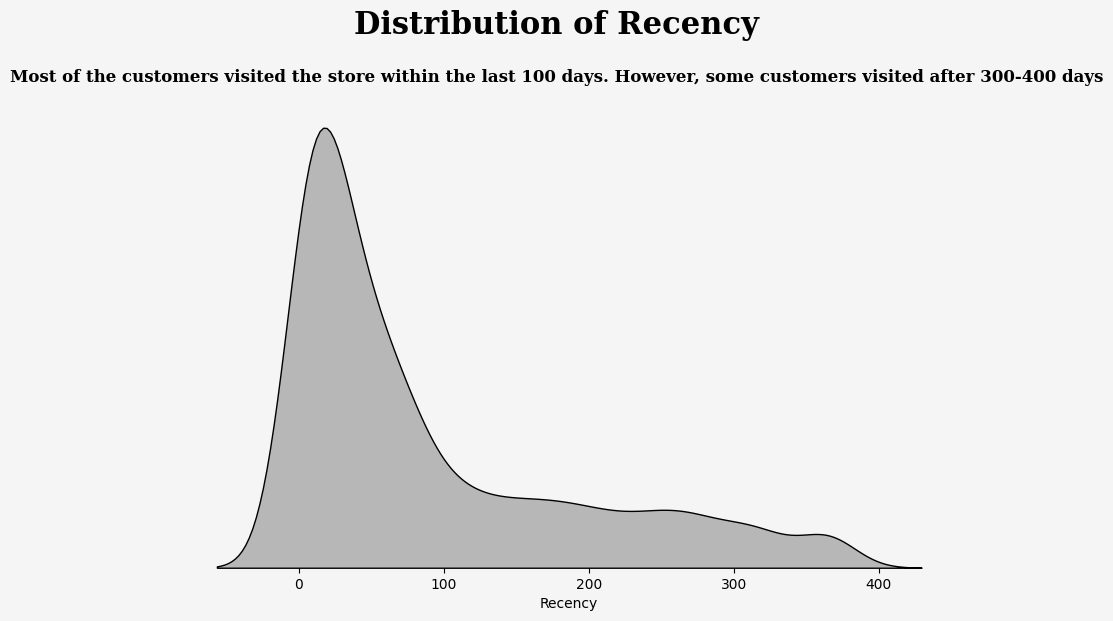

In [141]:
## Plot distribution of 'Recency'
plot_distribution(rmf_df, "Recency", "Distribution of Recency", "Most of the customers visited the store within the last 100 days. However, some customers visited after 300-400 days")

c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


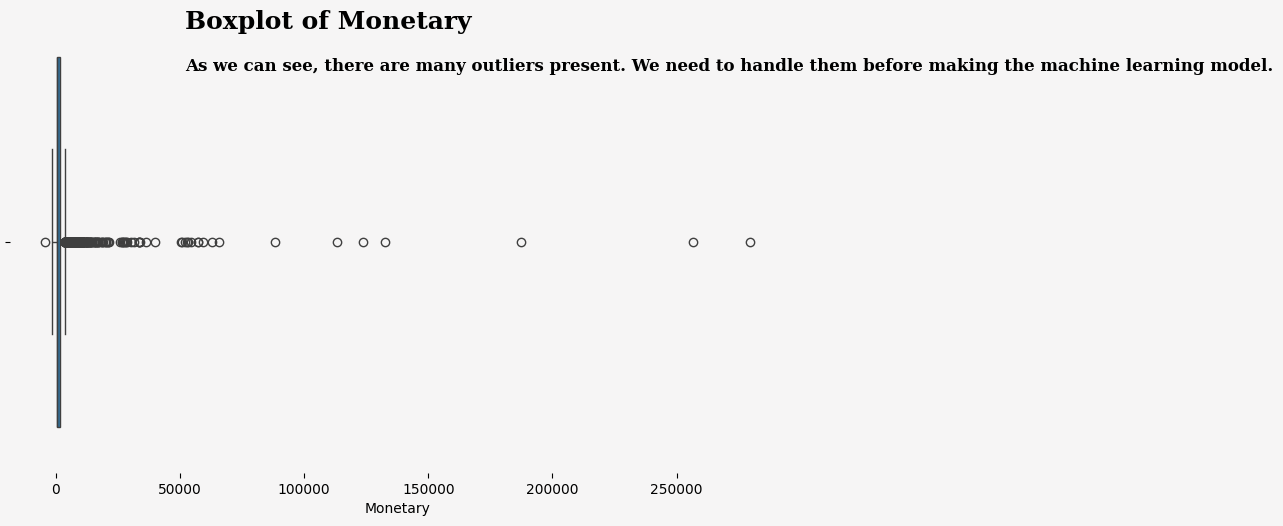

In [142]:
def boxplot(data, column, title, description, horizontal=False):
    """
    Create a boxplot for a given column in the DataFrame.

    Parameters:
    - data: DataFrame
    - column: str, column name to create a boxplot
    - title: str, plot title
    - description: str, plot description
    - horizontal: bool, whether to create a horizontal boxplot (default is False)
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a boxplot
    sns.boxplot(x=data[column] if not horizontal else None, y=data[column] if horizontal else None, ax=ax, orient='h' if horizontal else 'v')

    # Remove spines
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')

    # Add title and description
    fig.text(0.3, 0.85, title, fontweight="bold", fontfamily='serif', fontsize=18, color='black')
    fig.text(0.3, 0.78, description, fontweight="bold", fontfamily='serif', fontsize=12, color='black')

    # Show the plot
    plt.show()

boxplot(rmf_df, "Monetary", "Boxplot of Monetary", "As we can see, there are many outliers present. We need to handle them before making the machine learning model.")


c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


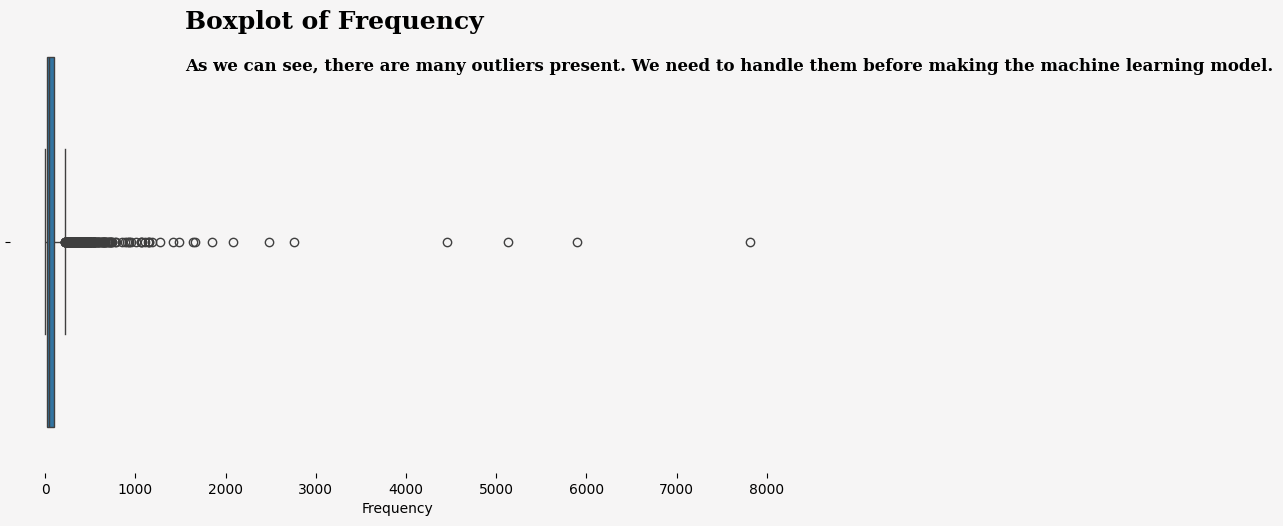

In [143]:
## Plot boxplot of 'Frequency'
boxplot(rmf_df, "Frequency", "Boxplot of Frequency", "As we can see, there are many outliers present. We need to handle them before making the machine learning model.")

c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


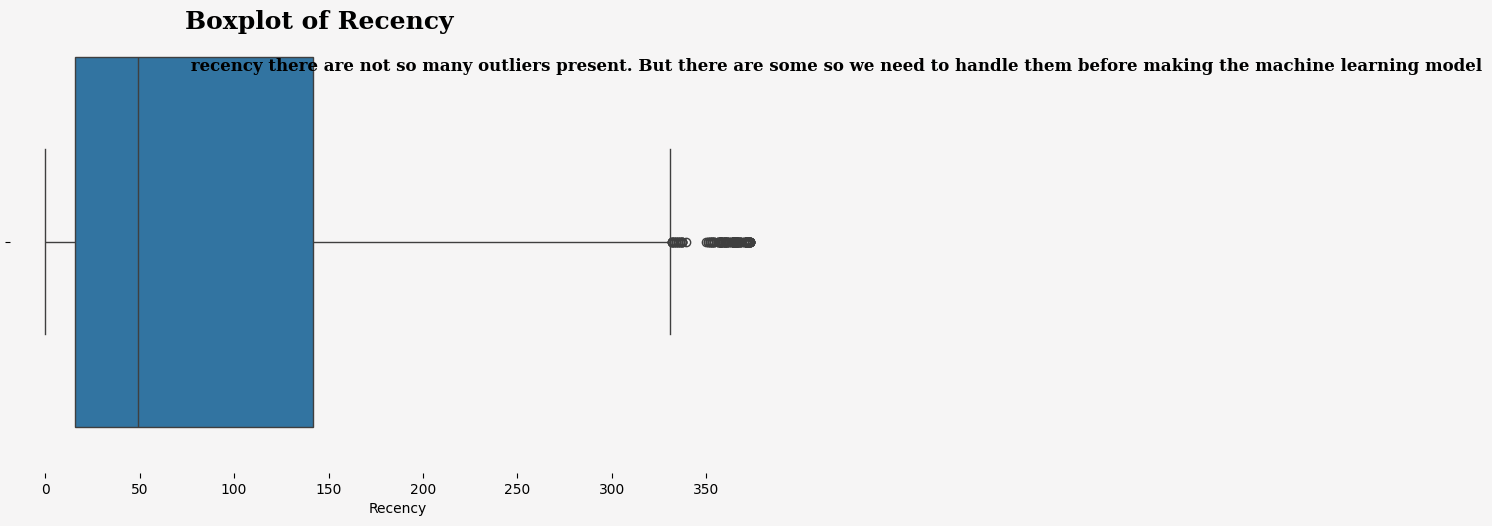

In [144]:
## Plot boxplot of 'Recency'
boxplot(rmf_df, "Recency", "Boxplot of Recency", " recency there are not so many outliers present. But there are some so we need to handle them before making the machine learning model")

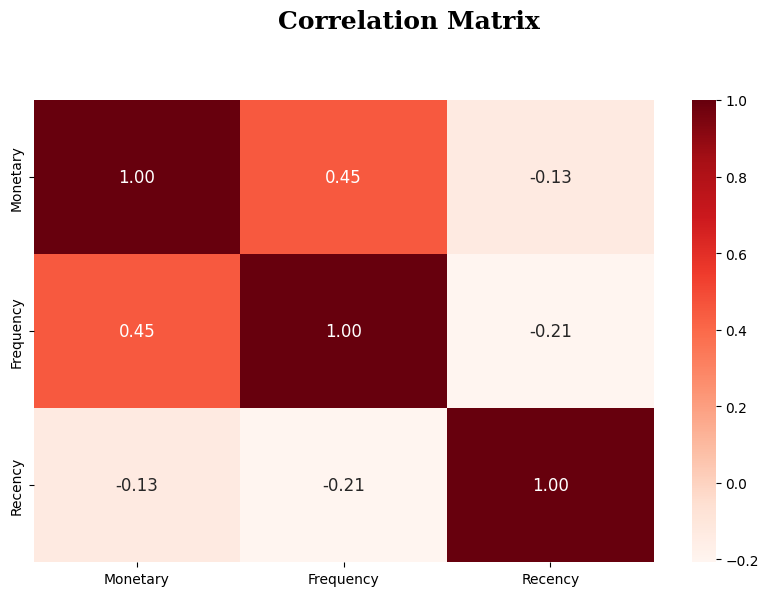

In [145]:
# Calculate the correlation matrix for the data and plot in a heatmap

def plot_correlation_matrix(data, title):
    """
    Plot the correlation matrix for the data and plot in a heatmap.

    Parameters:
    - data: DataFrame, input data
    - title: str, plot title
    """
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the correlation matrix in a heatmap
    sns.heatmap(data.corr(), annot=True, cmap='Reds', fmt='.2f', annot_kws={'size': 12}, ax=ax)

    # Set title
    fig.text(0.5, 1, title, {'font': 'Serif', 'weight': 'bold', 'size': 18, 'color': 'black'}, ha='center')

    # Show the plot
    plt.show()

RMF = rmf_df[['Monetary', 'Frequency', 'Recency']].copy()

plot_correlation_matrix(RMF, 'Correlation Matrix')

## Handle Outliers

Now let's do some cleaning. As we know that there are so many outliers present in the data set. Let's handle that.

In [146]:
import numpy as np

def drop_outliers(df, field_name, multiplier=1.5):
    """
    Remove outliers from a DataFrame based on the specified field.

    Parameters:
    - df: DataFrame
    - field_name: str, column name for outlier detection
    - multiplier: float, controls the sensitivity for outlier detection (default is 1.5)
    """
    q1 = np.percentile(df[field_name], 25)
    q3 = np.percentile(df[field_name], 75)
    iqr = multiplier * (q3 - q1)

    lower_bound = q1 - iqr
    upper_bound = q3 + iqr

    df.drop(df[(df[field_name] > upper_bound) | (df[field_name] < lower_bound)].index, inplace=True)

# Example usage:
drop_outliers(rmf_df, 'Recency')
drop_outliers(rmf_df, 'Frequency')
drop_outliers(rmf_df, 'Monetary')

## Scaling

In [147]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X = rmf_df[['Monetary', 'Frequency', 'Recency']].copy()

scaler = StandardScaler()

rmf_scaled = scaler.fit_transform(X)
rmf_scaled

array([[-1.15322183, -1.03094235,  2.54968376],
       [ 1.6223993 , -0.39913159, -0.19989566],
       [ 1.56110286,  0.5159047 , -0.81334764],
       ...,
       [-1.02840505, -0.92200946,  0.96128131],
       [-0.88048436, -0.79128999, -0.93384714],
       [ 1.68423626,  0.45054496, -0.55043965]])

In [148]:
rmf_df_scaled = pd.DataFrame(rmf_scaled).rename(columns={0: 'Monetary', 1: 'Frequency', 2: 'Recency'})
rmf_df_scaled.head()

,Monetary,Frequency,Recency
0,-1.153222,-1.030942,2.549684
1,1.622399,-0.399132,-0.199896
2,1.561103,0.515905,-0.813348
3,-0.636781,-0.704144,2.374412
4,1.233478,0.995209,-0.627121


# Modeling

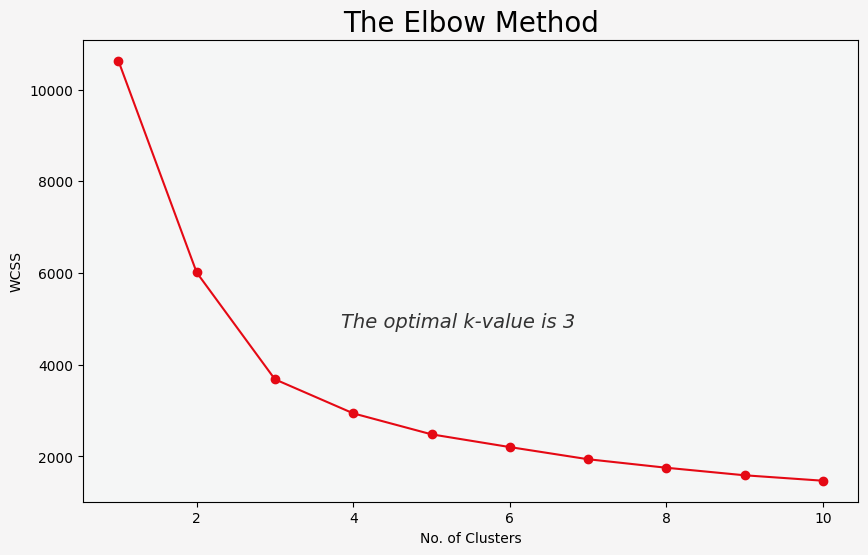

In [149]:
from sklearn.cluster import KMeans

def plot_elbow_method(x, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        km.fit(x)
        wcss.append(km.inertia_)

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f5f6f6')

    # Plot the Elbow Method curve
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='#E50914')
    
    # Title and labels
    plt.title('The Elbow Method', fontsize=20)
    plt.xlabel('No. of Clusters')
    plt.ylabel('WCSS')

    # Add text for the best k-value
    fig.text(0.5, 0.4, "The optimal k-value is 3", fontsize=14, ha='center', color='#333333', style='italic')

    # Show the plot
    plt.show()


plot_elbow_method(rmf_df_scaled, max_clusters=10)


# Cluster Analysis

## Analysing RFM of customers

1. Cluster 0:

* Recency: Low (-0.5)
* Frequency: Low (-0.3)
* Monetary: Low (-0.3)

Customer Profile 0:
This cluster represents customers who have not made purchases recently, shop infrequently, and have a low monetary value. They are inactive or sporadic customers who may need re-engagement strategies or incentives to resume buying activity.


2. Cluster 1:

* Recency: High (1.5)
* Frequency: Low (-0.6)
* Monetary: Low (-0.6)

Customer Profile 1:
Customers in this cluster made recent purchases but do so infrequently, with a low monetary value. This group may include customers who made a one-time purchase or new customers who need incentives to become regular buyers.


* Cluster 2:

* Recency: Low (-0.6)
* Frequency: High (1.4)
* Monetary: High (1.4)

Customer Profile 2:
This cluster represents customers who made recent, frequent, and high-value purchases. They are loyal and valuable customers contributing significantly to the total sales volume. Retention strategies and loyalty programs may be effective in keeping this group engaged.


         Recency  Frequency  Monetary
Cluster                              
0           -0.5       -0.3      -0.3
1            1.5       -0.6      -0.6
2           -0.6        1.4       1.4


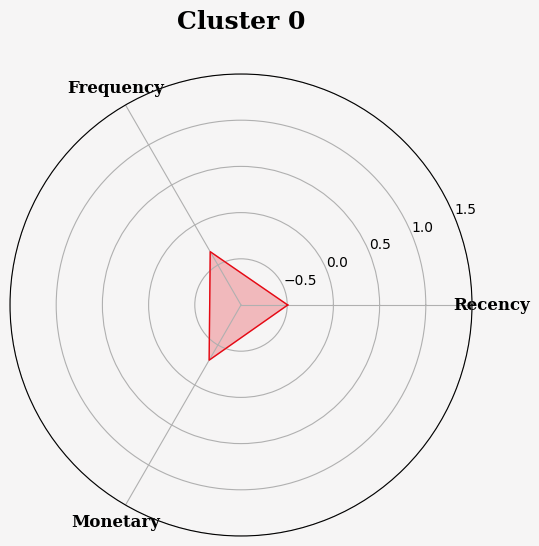

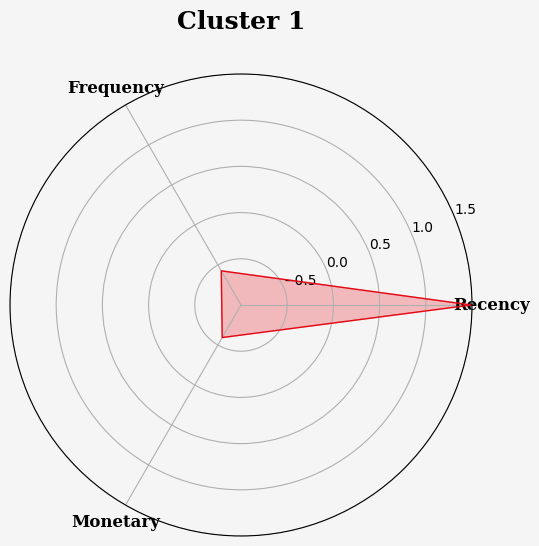

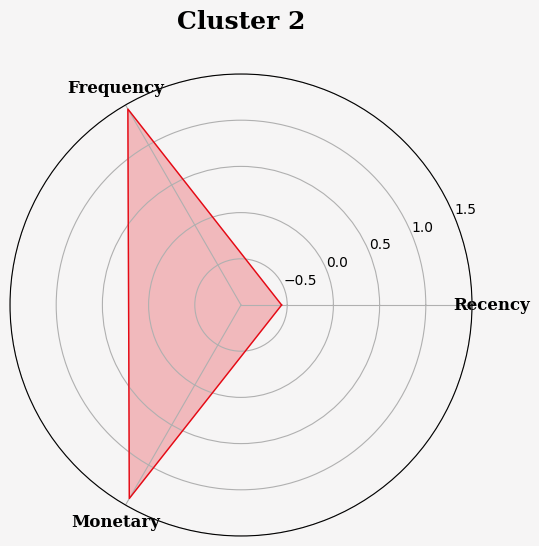

In [150]:
def plot_radar_chart(grouped, cluster):
    """
    Plot a radar chart for a given cluster.

    Parameters:
    - grouped: DataFrameGroupBy object
    - cluster: int, cluster number
    """
    # Get the data for the specified cluster
    cluster_data = grouped.get_group(cluster)

    # Define variables for the plot
    labels = np.array(['Recency', 'Frequency', 'Monetary'])
    stats = cluster_data[['Recency', 'Frequency', 'Monetary']].mean().values
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats, [stats[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')

    # Draw the plot
    ax.plot(angles, stats, color='#E50914', linewidth=1, linestyle='solid')
    ax.fill(angles, stats, color='#E50914', alpha=0.25)

    # Set the title
    ax.set_title(f'Cluster {cluster}', y=1.08, fontweight='bold', fontfamily='serif', fontsize=18, color='black')

    # Set the ticks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontweight='bold', fontfamily='serif', fontsize=12, color='black')

    # Set grid
    ax.grid(True)

    # Set the same y-axis limit for all charts
    ax.set_ylim([-1, 1.5])  # Adjust the range as needed

    # Show the plot
    plt.show()



k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model on the scaled data
kmeans.fit(rmf_df_scaled)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a DataFrame by adding a new cluster label column
rmf_df_scaled_cluster = rmf_df_scaled.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = rmf_df_scaled_cluster.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
# Print average values for each cluster
avg_values = grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

print(avg_values)

# Plot radar chart for Cluster 0
plot_radar_chart(grouped, cluster=0)

# Plot radar chart for Cluster 1
plot_radar_chart(grouped, cluster=1)

# Plot radar chart for Cluster 2
plot_radar_chart(grouped, cluster=2)


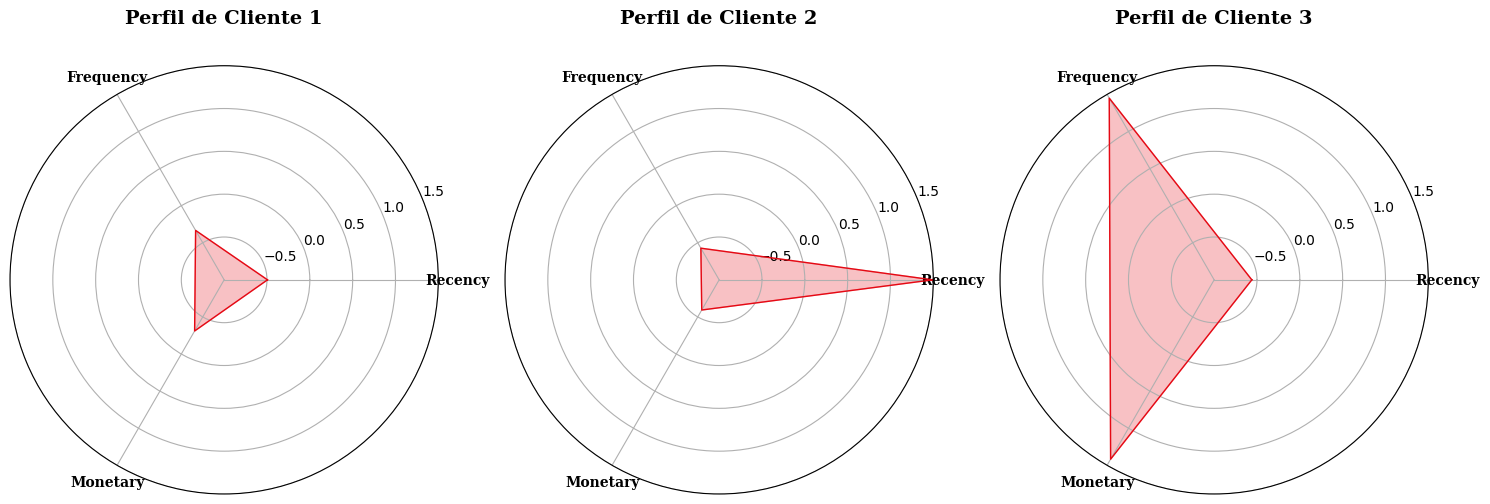

In [174]:
def plot_radar_chart(grouped):
    """
    Plot radar charts for each cluster in the same figure.

    Parameters:
    - grouped: DataFrameGroupBy object
    """
    # Define variables for the plot
    labels = np.array(['Recency', 'Frequency', 'Monetary'])

    # Set up the figure and axes
    fig, axs = plt.subplots(1, len(grouped), figsize=(15, 6), subplot_kw=dict(polar=True))
    
    # Iterate through each cluster
    for i, (cluster, cluster_data) in enumerate(grouped):
        stats = cluster_data[['Recency', 'Frequency', 'Monetary']].mean().values
        angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
        stats = np.concatenate((stats, [stats[0]]))
        angles = np.concatenate((angles, [angles[0]]))

        # Draw the plot for each cluster
        axs[i].plot(angles, stats, color='#E50914', linewidth=1, linestyle='solid')
        axs[i].fill(angles, stats, color='#E50914', alpha=0.25)

        # Set the title for each cluster
        axs[i].set_title(f'Perfil de Cliente {i+1}', y=1.08, fontweight='bold', fontfamily='serif', fontsize=14, color='black')

        # Set the ticks
        axs[i].set_xticks(angles[:-1])
        axs[i].set_xticklabels(labels, fontweight='bold', fontfamily='serif', fontsize=10, color='black')

        # Set grid
        axs[i].grid(True)

        # Set the same y-axis limit for all charts
        axs[i].set_ylim([-1, 1.5])  # Adjust the range as needed

    # Show the plot
    plt.tight_layout()
    plt.show()

plot_radar_chart(grouped)


In [151]:
rmf_df['Cluster'] = cluster_labels
print(rmf_df.shape)
rmf_df.head()

(3543, 5)


,CustomerID,Monetary,Frequency,Recency,Cluster
0,12346.0,0.00,2,325,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1
5,12352.0,1545.41,95,35,2


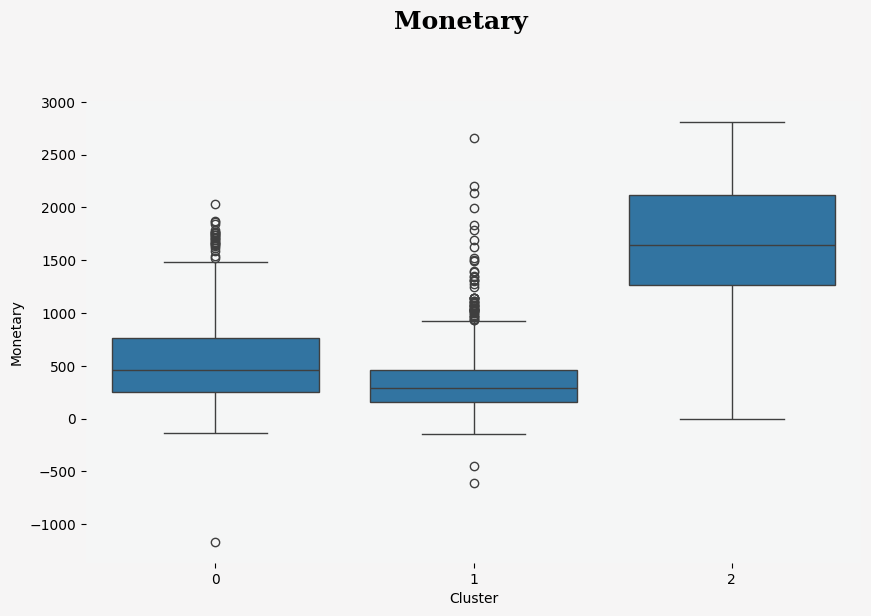

In [152]:
def cluster_boxplot(data, x, y, title):
    """
    Create a boxplot for a given dataset.

    Parameters:
    - data: DataFrame, input data
    - x: str, column name for the x-axis
    - y: str, column name for the y-axis
    - title: str, plot title
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a boxplot
    sns.boxplot(x=x, y=y, data=data, ax=ax)

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f5f6f6')

    # Remove spines
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    # Set title
    fig.text(0.5, 1, title, {'font': 'Serif', 'weight': 'bold', 'size': 18, 'color': 'black'}, ha='center')

    # Show the plot
    plt.show()

# Plot boxplot for 'Monetary'
cluster_boxplot(rmf_df, 'Cluster', 'Monetary', 'Monetary')

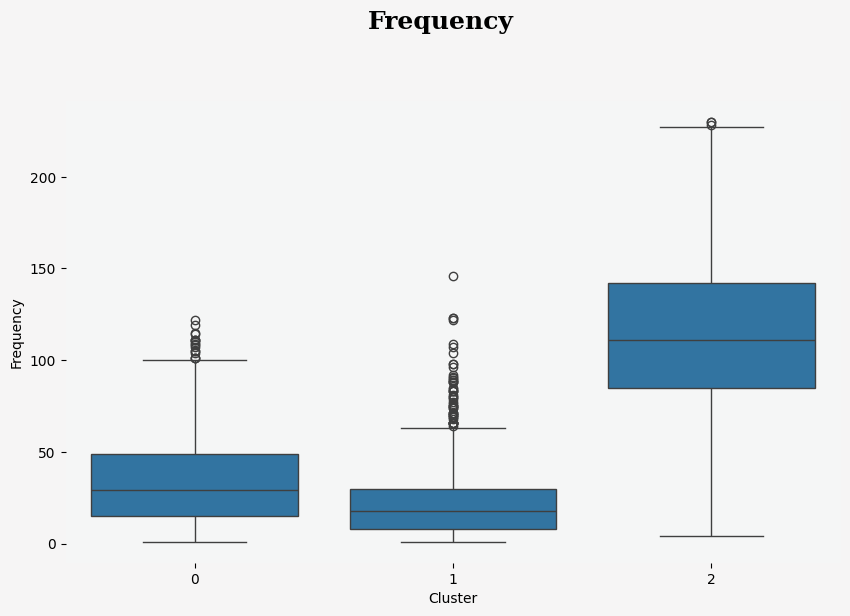

In [153]:
## Plot boxplot for 'Frequency'
cluster_boxplot(rmf_df, 'Cluster', 'Frequency', 'Frequency')

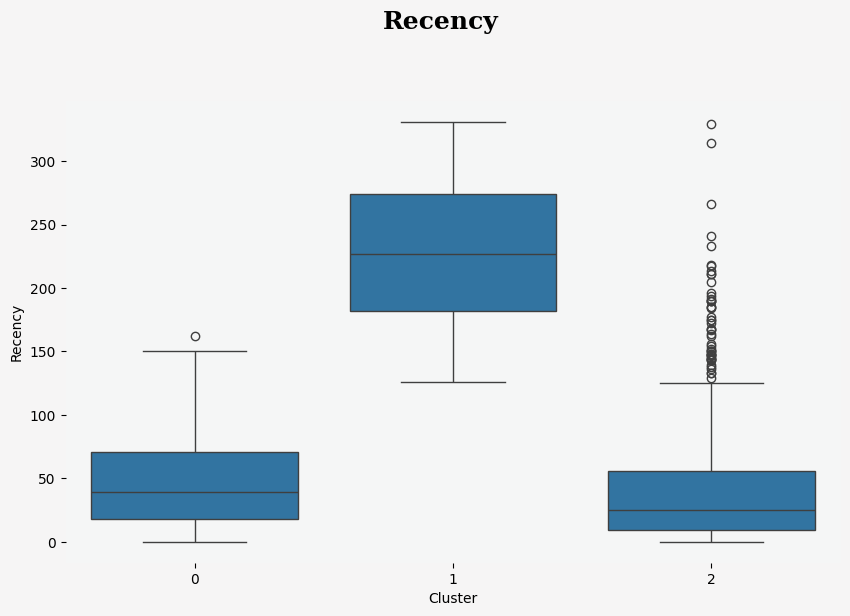

In [154]:
## Plot boxplot for 'Recency'
cluster_boxplot(rmf_df, 'Cluster', 'Recency', 'Recency')

The customer segmentation analysis reveals that there is a higher prevalence of customers belonging to Cluster 0. This group is characterized by low recency, low frequency, and low monetary values, suggesting a larger proportion of inactive or sporadic customers.

In contrast, Clusters 1 and 2 exhibit lower representation. Cluster 1 comprises customers with high recency but low frequency and monetary values, possibly indicating recent one-time purchasers. Cluster 2 represents a smaller, yet valuable, group of customers with low recency but high frequency and monetary values, suggesting loyal and high-value customers.

C:\Users\Lucas\AppData\Local\Temp\ipykernel_6336\2405802235.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, ax=ax, palette='Reds_d')


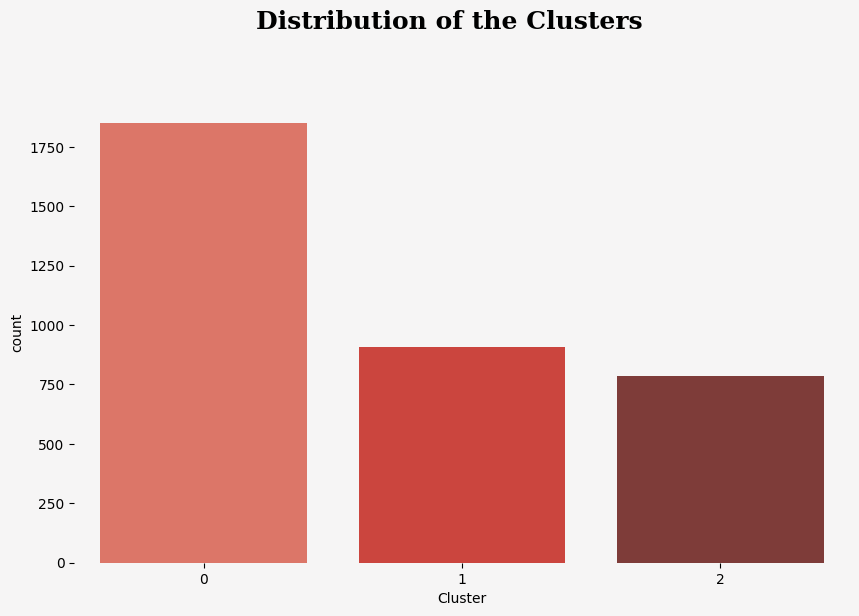

In [155]:
## plot the distribution of the clusters
def plot_cluster_distribution(data, column, title):
    """
    Plot the distribution of the clusters.

    Parameters:
    - data: DataFrame, input data
    - column: str, column name for the x-axis
    - title: str, plot title
    """
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the distribution of the clusters
    sns.countplot(x=column, data=data, ax=ax, palette='Reds_d')

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')

    # Remove spines
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    # Set title
    fig.text(0.5, 1, title, {'font': 'Serif', 'weight': 'bold', 'size': 18, 'color': 'black'}, ha='center')

    # Show the plot
    plt.show()

# Plot distribution of the clusters
plot_cluster_distribution(rmf_df, 'Cluster', 'Distribution of the Clusters')

## Categorizing Clusters

The assignment of segment names in the provided function is based on a thorough analysis of three distinct customer clusters. The goal is to accurately categorize customers into different value segments, taking into account their recency, frequency, and monetary characteristics.

## The 'Medium-Value' classification for Cluster 0 is justified by key factors:

* Recency: Low average recency (47.2) indicates less recent purchases.
* Frequency: Higher average frequency (34.0) shows consistent engagement.
* Monetary Value: Notably higher average monetary value (545.7) signifies a moderate but substantial contribution.
* Number of Customers: With 1851 customers, it's a sizable cluster, emphasizing its significance.

In summary, Cluster 0 represents a medium-value audience due to its moderate but consistent engagement, substantial monetary contribution, and a considerable number of customers.


## The 'Low-Value' classification for Cluster 1 is clear for the following reasons:

* Recency: Higher average recency (228.5) indicates less recent transactions.
* Frequency: Lower average frequency (23.0) suggests less overall activity in transactions.
* Monetary Value: Lower average monetary value (362.6) highlights a relatively lower contribution to the business.
* Number of Customers: With 907 customers, it's a substantial segment despite being smaller than Cluster 0.

In conclusion, 'Low-Value' accurately characterizes Cluster 1, emphasizing the importance of prioritizing customers with historical engagement and higher overall contribution over those who recently made a single purchase, providing a more significant impact on total profits.

## The 'High-Value' classification for Cluster 2 is unequivocally supported by the following key points:

* Recency: Low average recency (41.1) signifies more recent transactions, indicating a consistent and ongoing engagement with the business.
* Frequency: Higher average frequency (115.8) showcases frequent and regular transactions, reflecting a strong and sustained purchasing pattern.
* Monetary Value: Substantially higher average monetary value (1664.6) underscores the significant contribution of customers in this cluster to the overall revenue of the company.
* Number of Customers: Although smaller in size (785 customers), the cluster's impact is noteworthy, emphasizing its strategic importance.

In summary, the 'High-Value' classification for Cluster 2 accurately captures the essence of customers who consistently engage, transact frequently, and contribute significantly to the company's profits. This cluster is particularly crucial as it represents the customer segment generating the highest overall revenue for the business.

In [156]:
## identify what are the characteristics of each cluster
def cluster_characteristics(data, cluster):
    """
    Identify the characteristics of a given cluster.

    Parameters:
    - data: DataFrame, input data
    - cluster: int, cluster number
    """
    # Get the data for the specified cluster
    cluster_data = data[data['Cluster'] == cluster]

    # Print average values for each cluster
    print(f"Cluster {cluster}")
    print(f"Average Recency: {cluster_data['Recency'].mean():.1f}")
    print(f"Average Frequency: {cluster_data['Frequency'].mean():.1f}")
    print(f"Average Monetary: {cluster_data['Monetary'].mean():.1f}")
    print(f"Number of Customers: {cluster_data['Monetary'].count()}")
    print()


# Identify the characteristics of Cluster 0
cluster_characteristics(rmf_df, cluster=0)

# Identify the characteristics of Cluster 1
cluster_characteristics(rmf_df, cluster=1)

# Identify the characteristics of Cluster 2
cluster_characteristics(rmf_df, cluster=2)

## create a new column called 'Segment' that will contain the segment name for each customer
def segment(row):
    """
    Assign a segment name to each customer.

    Parameters:
    - row: DataFrame row
    """
    if row['Cluster'] == 0:
        return 'Medium-Value'
    elif row['Cluster'] == 1:
        return 'Low-Value'
    else:
        return 'High-Value'

# Create a new column 'Segment'
rmf_df['Segment'] = rmf_df.apply(segment, axis=1)

rmf_df.head()


Cluster 0
Average Recency: 47.2
Average Frequency: 34.0
Average Monetary: 545.7
Number of Customers: 1851

Cluster 1
Average Recency: 228.5
Average Frequency: 23.0
Average Monetary: 362.6
Number of Customers: 907

Cluster 2
Average Recency: 41.1
Average Frequency: 115.8
Average Monetary: 1664.6
Number of Customers: 785



,CustomerID,Monetary,Frequency,Recency,Cluster,Segment
0,12346.0,0.00,2,325,1,Low-Value
2,12348.0,1797.24,31,74,2,High-Value
3,12349.0,1757.55,73,18,2,High-Value
4,12350.0,334.40,17,309,1,Low-Value
5,12352.0,1545.41,95,35,2,High-Value


## Revenue per Type of Customer

The High-Value and Medium-Value customer segments are primary revenue drivers for the company due to their consistent and substantial contributions. High-Value customers, despite being fewer in number, engage frequently and make high-value transactions, resulting in a significant overall monetary impact. Medium-Value customers, with their larger customer base, may transact less frequently, but their substantial per-transaction contribution, combined with a sizable customer count, amplifies their role in driving revenue. In contrast, the Low-Value segment, characterized by higher recency, lower frequency, and lower monetary values, contributes less significantly to overall profits. Therefore, the revenue superiority of the High-Value and Medium-Value segments stems from a combination of consistent engagement, higher transaction values, and, in the case of Medium-Value, a larger customer base.


C:\Users\Lucas\AppData\Local\Temp\ipykernel_6336\1255271089.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Contribution to Revenue', data=data, ax=ax, palette='Reds_d')


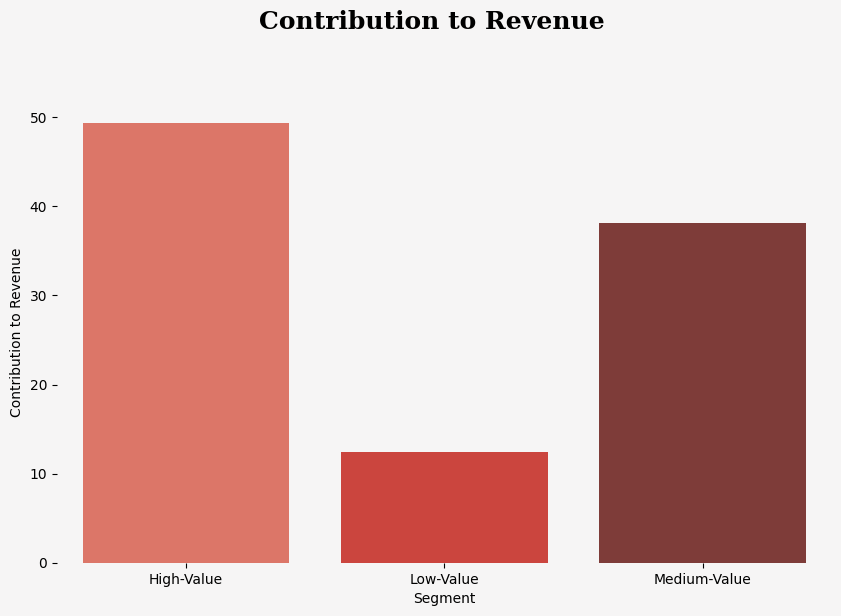

In [157]:
## Contribution to Revenue Stacked Bar Chart or Treemap: Illustrate the contribution of each cluster to the total revenue. This visual can highlight the importance of high-value clusters
def plot_contribution_to_revenue(data, title):
    """
    Plot the contribution to revenue for each segment.

    Parameters:
    - data: DataFrame, input data
    - title: str, plot title
    """

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the contribution to revenue for each segment
    sns.barplot(x='Segment', y='Contribution to Revenue', data=data, ax=ax, palette='Reds_d')

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')

    # Remove spines
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    # Set title
    fig.text(0.5, 1, title, {'font': 'Serif', 'weight': 'bold', 'size': 18, 'color': 'black'}, ha='center')

    # Show the plot
    plt.show()

# Calculate the total revenue
total_revenue = rmf_df['Monetary'].sum()

# Calculate the revenue for each segment
segment_revenue = rmf_df.groupby('Segment')['Monetary'].sum().reset_index()

# Calculate the contribution to revenue
segment_revenue['Contribution to Revenue'] = segment_revenue['Monetary'] / total_revenue * 100

# Plot the contribution to revenue for each segment
plot_contribution_to_revenue(segment_revenue, 'Contribution to Revenue')

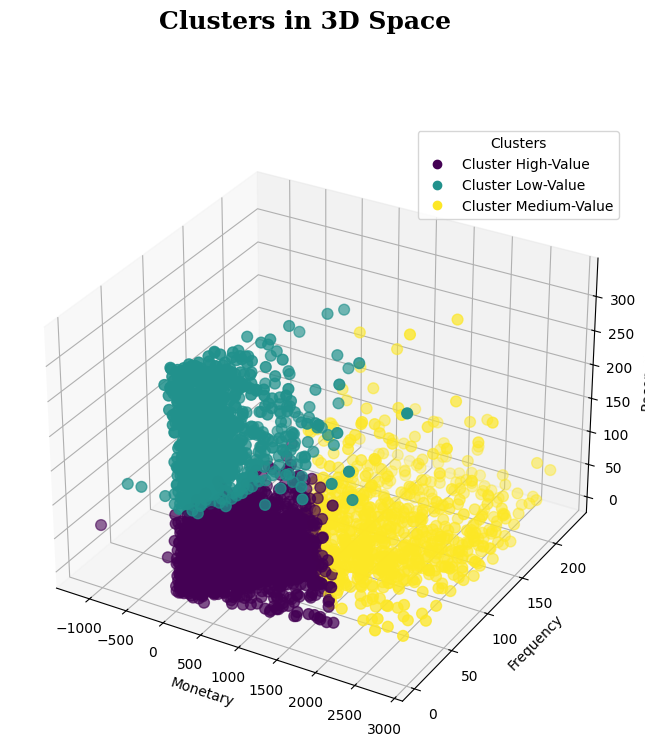

In [158]:
## plot a 3d scatter plot to visualize the clusters and use the Monetary, Frequency, and Recency variables as the x, y, and z axes, respectively, with the HUE parameter in the segment column

from mpl_toolkits.mplot3d import Axes3D


def plot_3d_scatter(data, x_variable, y_variable, z_variable, title):
    """
    Plot a 3D scatter plot to visualize the clusters.

    Parameters:
    - data: DataFrame, input data
    - x_variable: str, variable for x-axis
    - y_variable: str, variable for y-axis
    - z_variable: str, variable for z-axis
    - title: str, plot title
    """
    # Set up the figure and axes
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot a 3D scatter plot with a different palette (viridis)
    scatter = ax.scatter(data[x_variable], data[y_variable], data[z_variable], c=data['Cluster'], cmap='viridis', s=60)

    # Set x, y, and z-axis labels
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)
    ax.set_zlabel(z_variable)

    # Set title
    fig.text(0.5, 1, title, {'font': 'Serif', 'weight': 'bold', 'size': 18, 'color': 'black'}, ha='center')

    # Add a legend
    legend_labels = [f'Cluster {cluster}' for cluster in sorted(data['Segment'].unique())]
    ax.legend(handles=scatter.legend_elements()[0], title='Clusters', labels=legend_labels)

    # Ajuste a posição do texto da legenda do eixo z
    ax.zaxis.label.set_position((0.5, 0.5))

    # Show the plot
    plt.show()


plot_3d_scatter(rmf_df, 'Monetary', 'Frequency', 'Recency', 'Clusters in 3D Space')

# Churn

## Churn per Type of Customer

For the store, churn is defined as a customer being absent for a minimum of 45 days. In this context, the Low-Value segment exhibits 100% churn, signifying that all customers in this group have been inactive for at least 45 days. The Medium-Value segment demonstrates a balanced dynamic, with approximately half experiencing churn, indicating a lapse in activity, while the other half remains active. Contrarily, the High-Value segment displays the lowest churn rate, with the fewest customers being absent for extended periods. This distinction underscores the varying customer retention challenges across segments, emphasizing the need for targeted retention strategies, particularly for the Low-Value group, to mitigate churn and sustain customer engagement.

C:\Users\Lucas\AppData\Local\Temp\ipykernel_6336\312777911.py:21: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=xcol, hue=ycol, data=data, ax=ax, palette=colors)


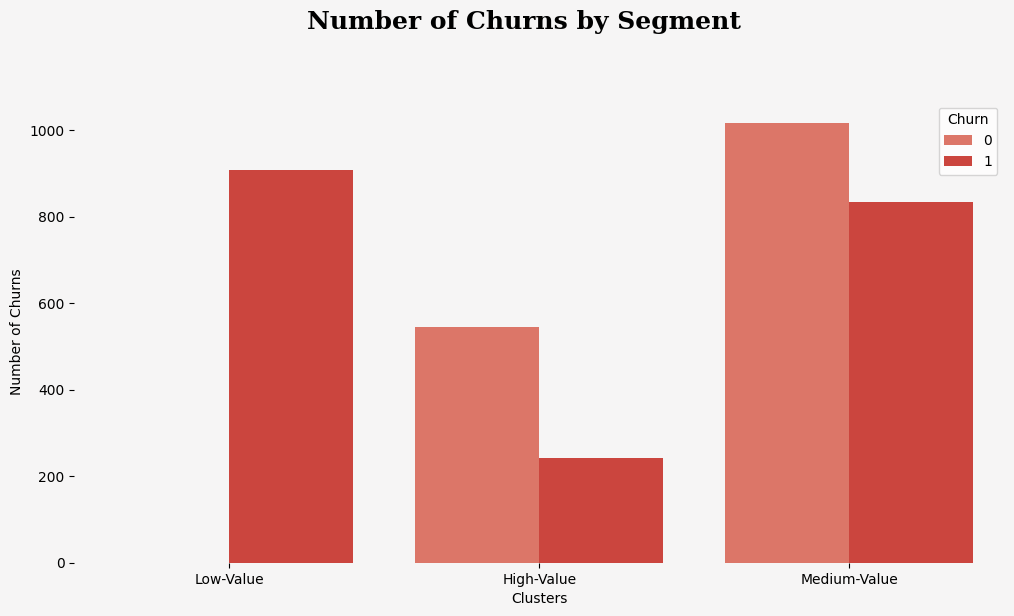

In [159]:
## Churn Analysis: Survival Curve or Kaplan-Meier Curve: Visualize customer churn rates within each cluster over time. This helps identify when customers are most likely to churn.


def countplot(data, title='Number of Churns by Segment', xcol = 'Segment', ycol='Churn'):
    """
    Plot bar charts of the number of churns for each segment.

    Parameters:
    - data: DataFrame, input data with 'Cluster' and 'Churn' columns
    - title: str, title of the plot
    - ycol: str, name of the column containing churn status
    """

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Initialize a color palette
    colors = sns.color_palette("Reds_d", n_colors=len(data['Cluster'].unique()))

    # Plot the number of churns for each segment
    sns.countplot(x=xcol, hue=ycol, data=data, ax=ax, palette=colors)

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')

    # Remove spines
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    # Set title
    fig.text(0.5, 1, title, {'font': 'Serif', 'weight': 'bold', 'size': 18, 'color': 'black'}, ha='center')

    # Set x-axis label
    ax.set_xlabel('Clusters')

    # Set y-axis label
    ax.set_ylabel('Number of Churns')

    # Show the plot
    plt.show()



## calculate the churn rate for each cluster without using the churn variable, create a new column called 'Churn' that will contain the churn status for each customer
def churn(row):
    """
    Assign a churn status to each customer.

    Parameters:
    - row: DataFrame row
    """
    if row['Recency'] > 45:
        return 1
    else:
        return 0

# Create a new column 'Churn'
rmf_df['Churn'] = rmf_df.apply(churn, axis=1)

# Plot the churn rate for each segment
countplot(rmf_df)

In [160]:
## filter low value segment and churn = 1
low_value_churn = rmf_df[(rmf_df['Segment'] == 'Low-Value') & (rmf_df['Churn'] == 1)]
## filter low value segment
low_value = rmf_df[(rmf_df['Segment'] == 'Low-Value')]
print(low_value_churn.shape, low_value.shape)
low_value_churn.head()

(907, 7) (907, 7)


,CustomerID,Monetary,Frequency,Recency,Cluster,Segment,Churn
0,12346.0,0.0,2,325,1,Low-Value,1
4,12350.0,334.4,17,309,1,Low-Value,1
6,12353.0,89.0,4,203,1,Low-Value,1
7,12354.0,1079.4,58,231,1,Low-Value,1
8,12355.0,459.4,13,213,1,Low-Value,1


# CLV

CLV is a crucial metric that estimates the total revenue a business can expect from a customer throughout their entire relationship. The formula used in the code divides the product of the customer's monetary value and transaction frequency by the complement of the churn rate.

## CLV per Type of Customer

Now, examining the CLV across customer segments, it becomes evident that the High-Value group exhibits the highest CLV among all segments. This result aligns with the expectation that customers with higher transaction values and frequencies, as observed in the High-Value segment, tend to contribute more to the business over their lifetime. Following closely is the Medium-Value group, indicating a substantial but slightly lower CLV compared to the High-Value segment. Notably, the Low-Value segment lags significantly behind in CLV, emphasizing the importance of focusing on customer retention and value enhancement strategies, especially for the High-Value segment, to maximize the overall lifetime value of the customer base.

Churn Rate: 55.94%


C:\Users\Lucas\AppData\Local\Temp\ipykernel_6336\22607743.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='CLV', data=data, ax=ax, palette='Reds_d')


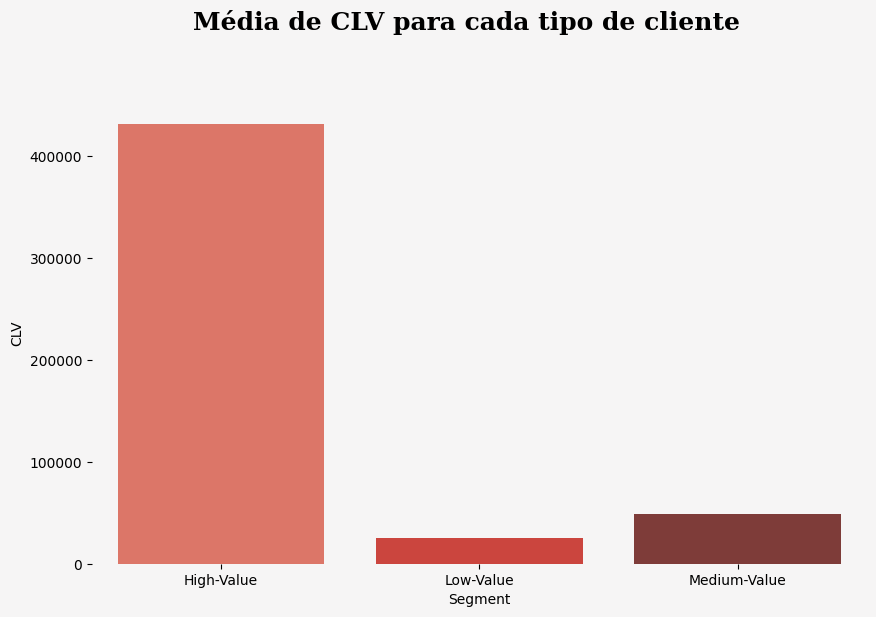

In [175]:
## calculate CLV for each customer and put in a new column
## calculate churn rate number of churns / total number of customers

def clv(row, churn_rate):
    """
    Calculate the CLV for each customer.

    Parameters:
    - row: DataFrame row
    """
    return (row['Monetary'] * row['Frequency']) / (1 - churn_rate)

## Customer Lifetime Value (CLV) Analysis: Bar Chart: Visualize the average CLV for each cluster. This helps identify the most valuable clusters.
def plot_clv(data, title):
    """
    Plot the CLV for each segment.

    Parameters:
    - data: DataFrame, input data
    - title: str, plot title
    """
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the CLV for each segment
    sns.barplot(x='Segment', y='CLV', data=data, ax=ax, palette='Reds_d')

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')

    # Remove spines
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    # Set title
    fig.text(0.5, 1, title, {'font': 'Serif', 'weight': 'bold', 'size': 18, 'color': 'black'}, ha='center')

    # Show the plot
    plt.show()

# Calculate the churn rate of every one
churn_rate = rmf_df['Churn'].sum() / rmf_df['Churn'].count()
print(f"Churn Rate: {churn_rate:.2%}")

# Create a new column 'CLV'
rmf_df['CLV'] = rmf_df.apply(clv, axis=1, churn_rate=churn_rate)

# Calculate the average CLV for each segment
segment_clv = rmf_df.groupby('Segment')['CLV'].mean().reset_index()

# Plot the CLV for each segment
plot_clv(segment_clv, 'Média de CLV para cada tipo de cliente')


## CLV per RFM

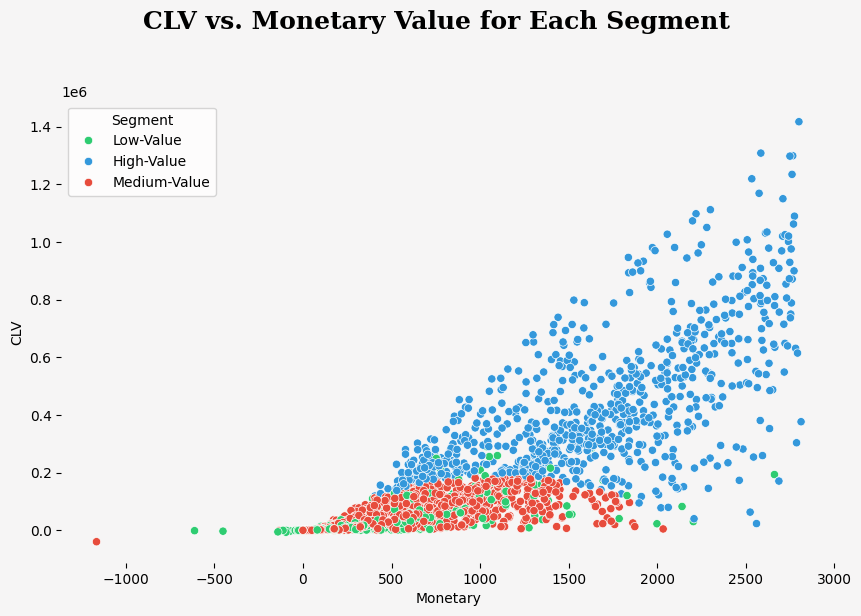

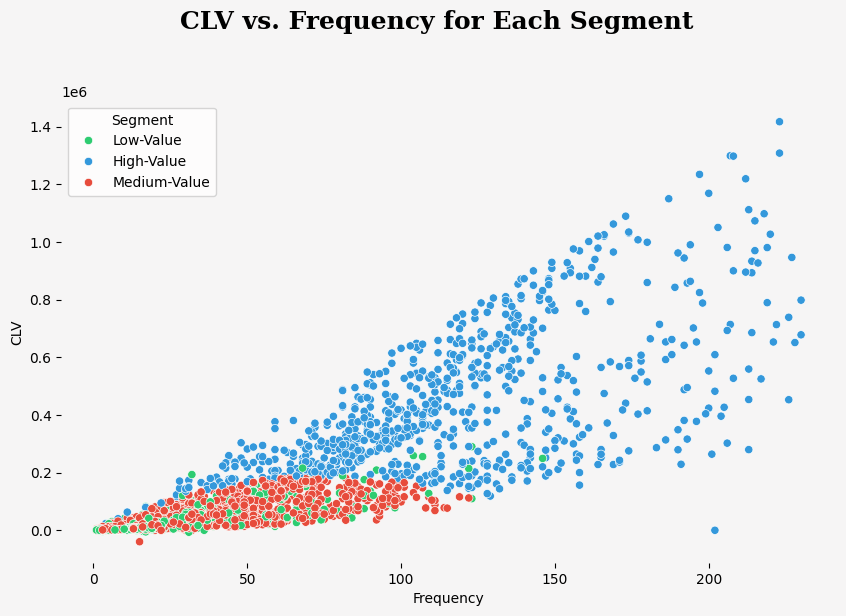

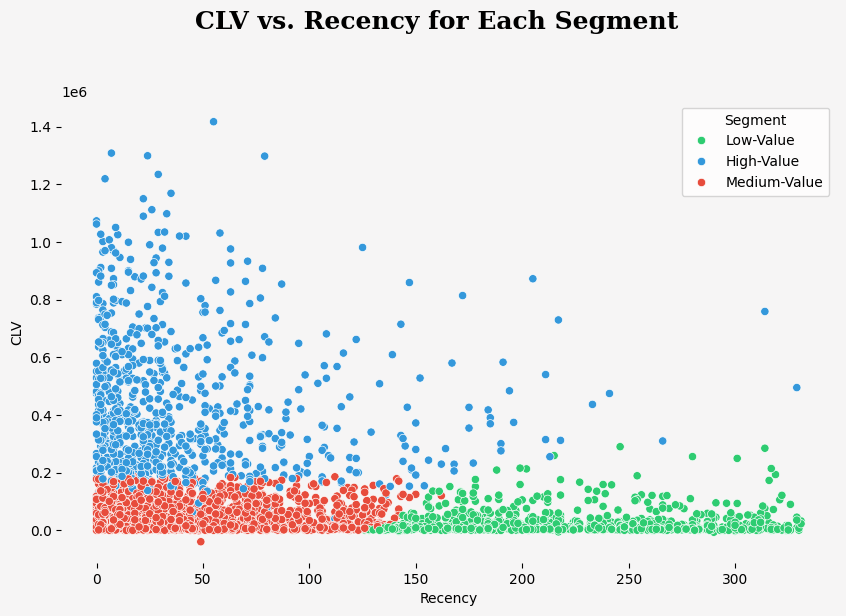

In [162]:
def plot_clv_vs_variable(data, x_variable, y_variable, title):
    """
    Plot the CLV vs. specified variable for each segment.

    Parameters:
    - data: DataFrame, input data
    - x_variable: str, variable for x-axis
    - y_variable: str, variable for y-axis (CLV)
    - title: str, plot title
    """

    # Defina sua paleta personalizada com tons de verde, azul e vermelho
    custom_palette = sns.color_palette(['#2ecc71', '#3498db', '#e74c3c'])

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the CLV vs. specified variable for each segment with a custom palette
    sns.scatterplot(x=x_variable, y=y_variable, hue='Segment', data=data, ax=ax, palette=custom_palette)

    # Set background colors
    fig.patch.set_facecolor('#f6f5f5')
    ax.set_facecolor('#f6f5f5')

    # Remove spines
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    # Set title
    fig.text(0.5, 1, title, {'font': 'Serif', 'weight': 'bold', 'size': 18, 'color': 'black'}, ha='center')

    # Show the plot
    plt.show()



# Example usage:
plot_clv_vs_variable(rmf_df, 'Monetary', 'CLV', 'CLV vs. Monetary Value for Each Segment')
plot_clv_vs_variable(rmf_df, 'Frequency', 'CLV', 'CLV vs. Frequency for Each Segment')
plot_clv_vs_variable(rmf_df, 'Recency', 'CLV', 'CLV vs. Recency for Each Segment')


# Cohort

A cohort is a group of individuals who share a common characteristic or experience within a specific timeframe. In customer analytics, cohort analysis involves grouping customers based on a shared attribute, often their acquisition or engagement date. This approach allows businesses to track and compare the behavior and performance of distinct customer groups over time, providing valuable insights into trends, retention rates, and the effectiveness of marketing strategies. Cohort analysis is a powerful tool for businesses to understand and respond to the evolving dynamics of customer segments.

In [163]:
## Análise de Cohort: Agrupe os clientes por cohort (por exemplo, mês de aquisição) e analise como o comportamento varia entre os clusters ao longo do tempo.

## create a new column called 'Cohort' that will contain the cohort for each customer

def cohort(row):
    """
    Assign a cohort to each customer.

    Parameters:
    - row: DataFrame row
    """
    return row['InvoiceDate'].strftime('%Y-%m')

# Create a new column 'Cohort'
df['Cohort'] = df.apply(cohort, axis=1)

## group the data by cohort
cohort_df = (
    df.groupby(['Cohort', 'CustomerID'])
    .agg(num_transactions=('InvoiceNo', 'nunique'))
    .reset_index()
)

print(df.shape)
print(cohort_df.shape)
cohort_df.head()

(401604, 11)
(13675, 3)


,Cohort,CustomerID,num_transactions
0,2010-12,12347.0,1
1,2010-12,12348.0,1
2,2010-12,12370.0,2
3,2010-12,12377.0,1
4,2010-12,12383.0,1


In [164]:
# Create a pivot table with the number of transactions for each cohort

cohort_pivot = (
    cohort_df.pivot_table(index='Cohort', columns='CustomerID', values='num_transactions')
    .fillna(0)
)

cohort_pivot.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
Cohort,,,,,,,,,,,,,,,,,,,,,
2010-12,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0
2011-02,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-03,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2011-04,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Number of Transactions per Cohort

The analysis involved plotting the top 5 customers within each cohort, with cohorts grouped by month. This approach allowed for a focused examination of the five most significant customers in each monthly cohort, providing a clear visualization of their individual behaviors and contributions over time

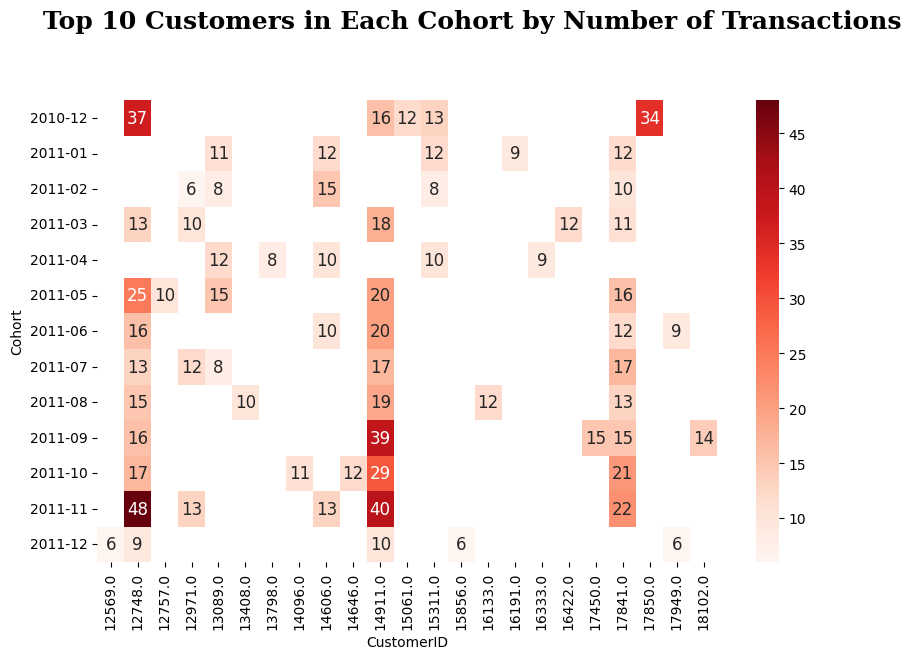

In [165]:
def plot_top_n_cohort_heatmap(data, n, title):
    """
    Plot a heatmap of the cohort pivot table showing the top N customers within each cohort.

    Parameters:
    - data: DataFrame, input data
    - n: int, number of top customers to display for each cohort
    - title: str, plot title
    """
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot a heatmap of the top N customers within each cohort
    sns.heatmap(data.apply(lambda x: x.nlargest(n), axis=1), annot=True, cmap='Reds', fmt='.0f', annot_kws={'size': 12}, ax=ax)

    # Set title
    fig.text(0.5, 1, title, {'font': 'Serif', 'weight': 'bold', 'size': 18, 'color': 'black'}, ha='center')

    # Show the plot
    plt.show()

# Example usage
plot_top_n_cohort_heatmap(cohort_pivot, 5, 'Top 10 Customers in Each Cohort by Number of Transactions')


In [166]:

## calculate the retention rate for each cohort
def retention_rate(data):
    """
    Calculate the retention rate for each cohort.

    Parameters:
    - data: DataFrame, input data
    """
    # Calculate the number of active customers for each cohort
    num_active_customers = data.apply(lambda x: x >= 1).sum(axis=1)

    # Calculate the retention rate for each cohort
    retention_rate = data.divide(num_active_customers, axis=0).round(2) * 100

    return retention_rate

# Calculate the retention rate for each cohort
retention_rate = retention_rate(cohort_pivot)
retention_rate.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
Cohort,,,,,,,,,,,,,,,,,,,,,
2010-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


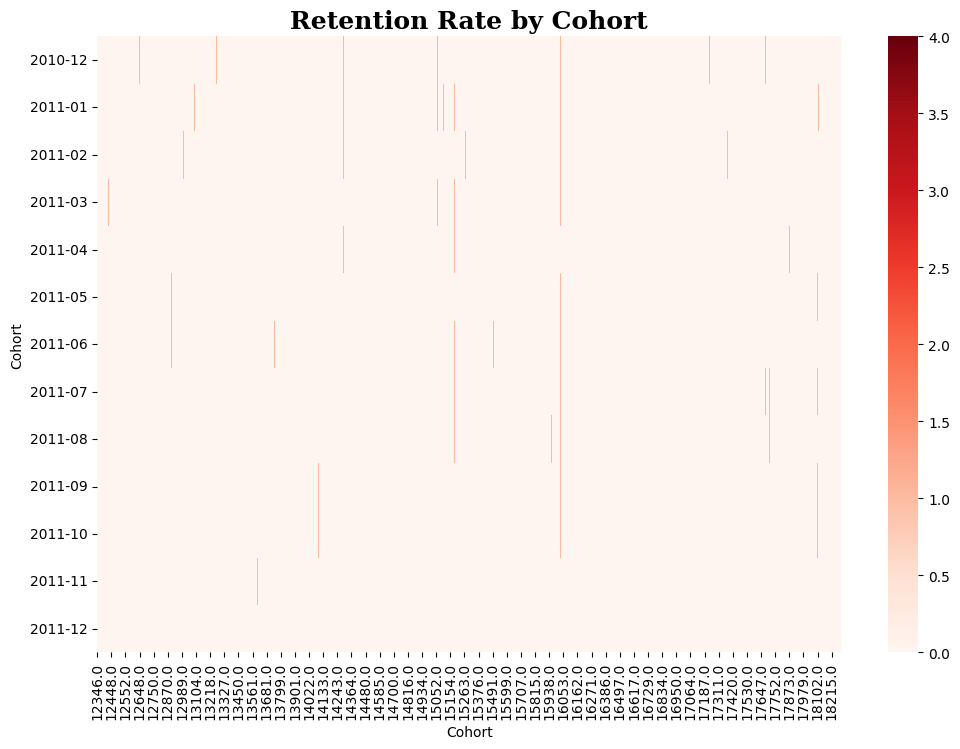

In [167]:
## plot a heatmap of the retention rate for each cohort (create a function)

def plot_cohort_heatmap(data, title):
    """
    Plot a heatmap of the retention rate for each cohort.

    Parameters:
    - data: DataFrame, input data
    - title: str, plot title
    """

    # Plot the retention rate for each cohort
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(retention_rate, annot=False, cmap='Reds', fmt='.0f', ax=ax)
    ax.set_title('Retention Rate by Cohort', fontweight='bold', fontfamily='serif', fontsize=18, color='black')
    ax.set_xlabel('Cohort')
    ax.set_ylabel('Cohort')
    plt.show()

plot_cohort_heatmap(retention_rate, 'Retention Rate for Each Cohort')

## Number of Customers per Cohort

Various metrics, including customer count, transactions, and profits, were plotted for each cohort, with all metrics following a consistent graphical pattern. Notably, the analyses revealed that the year-end periods consistently exhibited the highest numbers of customers, consequently leading to increased transaction volumes and profits. This observation underscores a seasonal trend, where the holiday seasons tend to attract a larger customer base, resulting in heightened business activity and financial gains. The synchronized patterns across metrics and cohorts provide valuable insights into the correlation between customer engagement, transactional behavior, and overall profitability during specific periods, guiding strategic planning and resource allocation.

In [168]:
## group the data by cohort and calculate the number of customers in each cohort

cohort_size = (
    df.groupby('Cohort')
    .agg(num_customers=('CustomerID', 'nunique'))
    .reset_index()
)

cohort_size.head()

,Cohort,num_customers
0,2010-12,948
1,2011-01,783
2,2011-02,798
3,2011-03,1020
4,2011-04,899


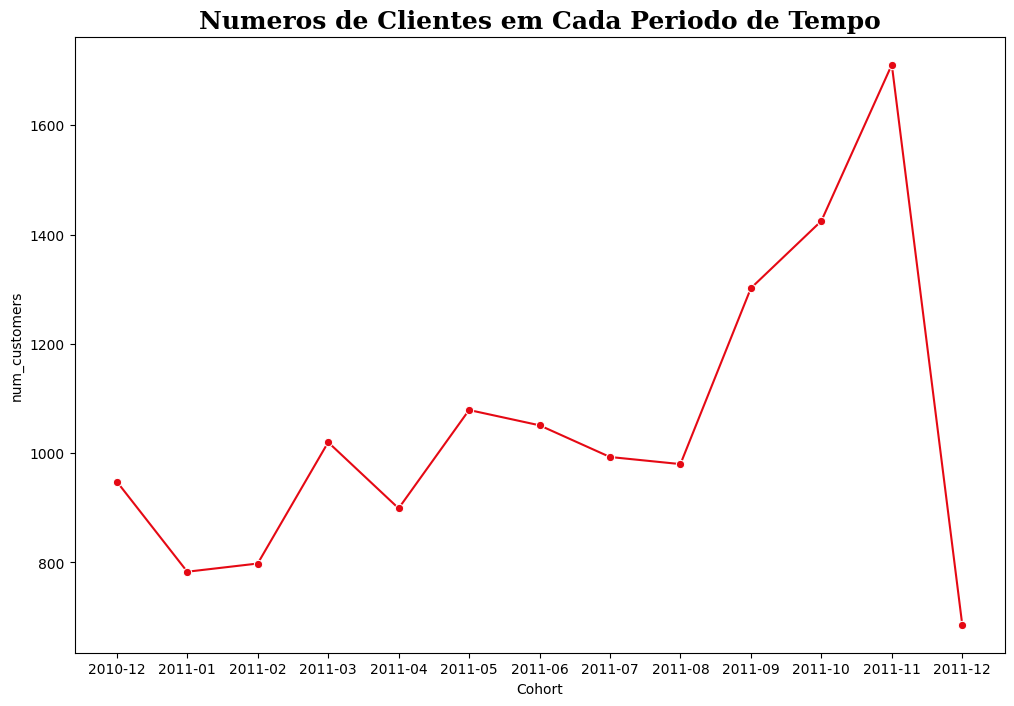

In [176]:
def plot_cohort_analysis(data, title, y_variable):
    """
    Parameters:
    - data: DataFrame, input data
    - title: str, plot title
    """
    
    # Plot the line chart based on the selected metric
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x='Cohort', y=y_variable, data=data, ax=ax, marker='o', color='#E50914')
    
    # Set title and labels
    ax.set_title(f'{title}', fontweight='bold', fontfamily='serif', fontsize=18, color='black')
    ax.set_xlabel('Cohort')
    ax.set_ylabel(y_variable)

    plt.show()

# Example usage
plot_cohort_analysis(cohort_size, 'Numeros de Clientes em Cada Periodo de Tempo', y_variable='num_customers')

## Average Transactions per Customer

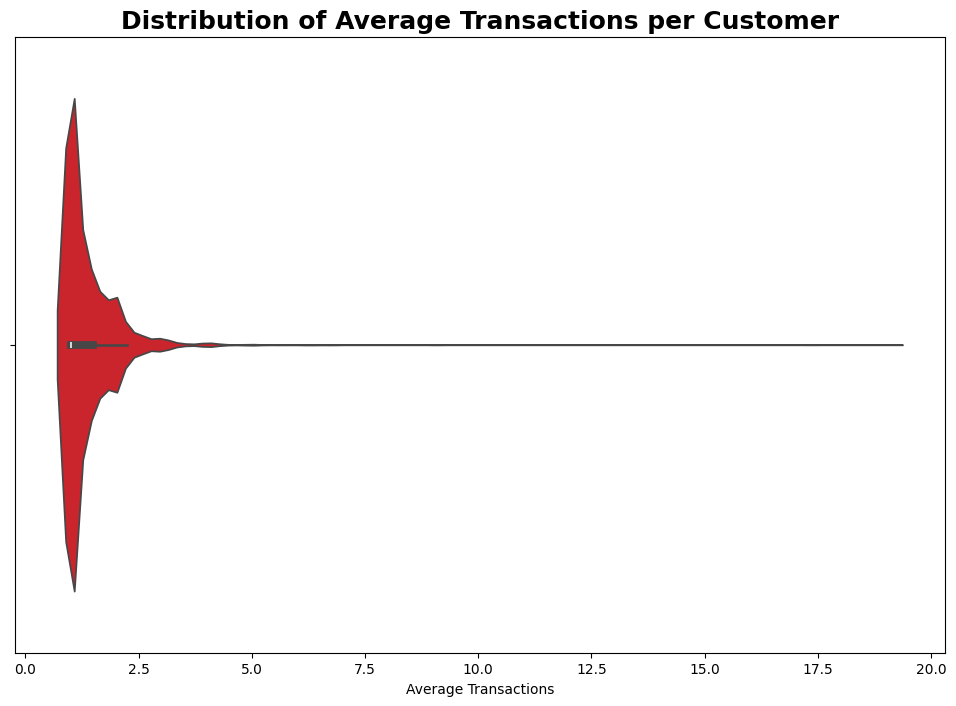

In [170]:
average_transactions_per_customer = cohort_df.groupby('CustomerID')['num_transactions'].mean().reset_index()
average_transactions_per_customer

# Plot a violin plot for the average transactions per customer using Seaborn
plt.figure(figsize=(12, 8))
sns.violinplot(x='num_transactions', data=average_transactions_per_customer, color='#E50914')
plt.title('Distribution of Average Transactions per Customer', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Average Transactions')
plt.show()



## Number of Transactions per Cohort

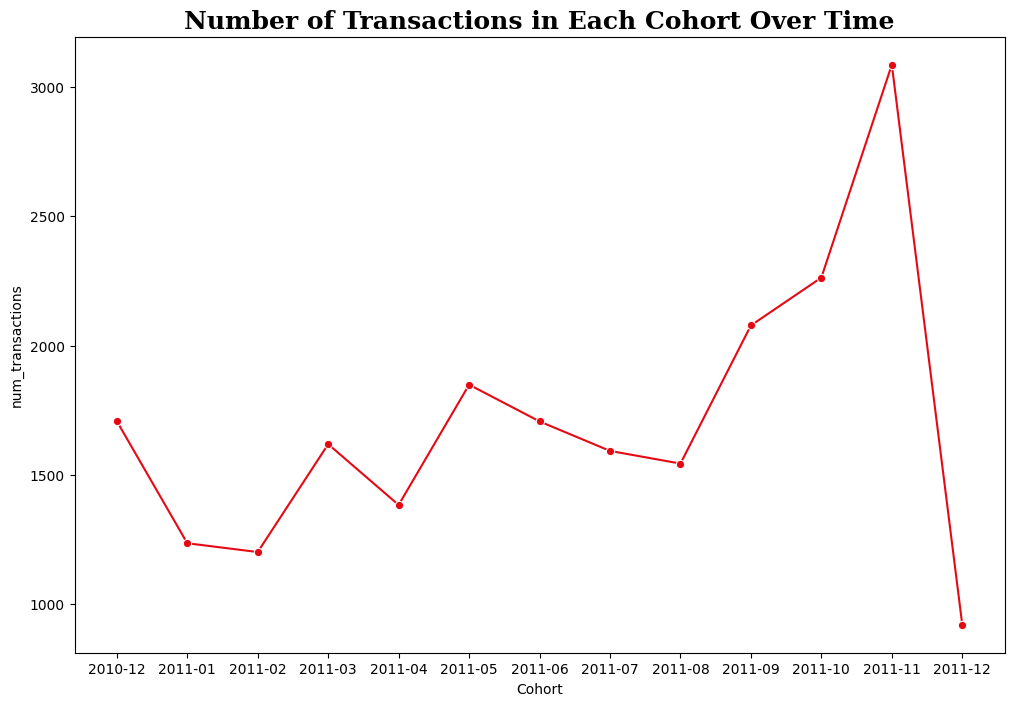

In [171]:
## calcule o numero de transações feitas em cada cohort
cohort_transactions = (
    df.groupby(['Cohort'])
    .agg(num_transactions=('InvoiceNo', 'nunique'))
    .reset_index()
)

plot_cohort_analysis(cohort_transactions, 'Number of Transactions in Each Cohort Over Time', y_variable='num_transactions')

## Revenue per Cohort

In [172]:
## calculate the revenue for each cohort

cohort_revenue = (
    df.groupby(['Cohort'])
    .agg(revenue=('amount', 'sum'))
    .reset_index()
)

cohort_revenue.head()

,Cohort,revenue
0,2010-12,552372.860
1,2011-01,473731.900
2,2011-02,435534.070
3,2011-03,578576.210
4,2011-04,425222.671


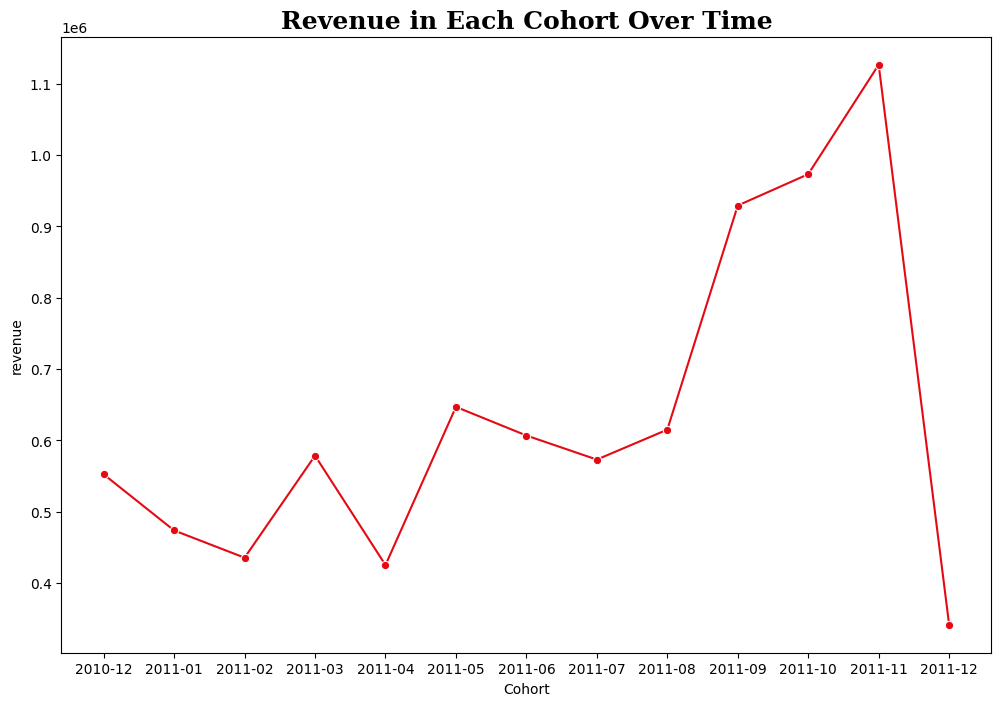

In [173]:
plot_cohort_analysis(cohort_revenue, 'Revenue in Each Cohort Over Time', y_variable='revenue')